# Substructures & substructure filters



In [21]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv

In [22]:
with open('data/CHEMBL27-chembl_27_activity-Or8O5vK6yNZ1L5id7ev7PGK1lWhfDfRKRJbbuXPM9Os=.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    cnr1_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]
    
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [15:37:44] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [15:37:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getExplicitValence() called without call to calcExplicitValence()
RDKit ERROR: Violation occurred on line 196 in file /Users/runner/miniforge3/conda-bld/rdkit_1589101087863/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_explicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [16:20:22] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:20:22] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [16:20:22] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [16:20:22] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [16:20:22] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:20:23] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 

RDKit ERROR: [16:20:23] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [16:20:23] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [16:20:23] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [16:20:23] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [16:20:23] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [16:20:23] ERROR: Could not sanitize molecule ending on line 468852
RDKit ERROR: [16:20:23] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [16:20:23] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [16:20:23] ERROR: Could not sanitize molecule ending on line 469201
RDKit ERROR: [16:20:23] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [16:20:24] Explicit valence for atom # 53 N, 4, is greater than pe

RDKit ERROR: [16:20:24] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:20:26] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [16:20:26] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [16:20:26] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [16:20:26] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [16:20:26] ERROR: Could not sanitize molecule ending on line 1151592


In [23]:
import itertools
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

def visualize_match(structure, pattern):
    # GetSubstructMatches grabs all hits, GetSubstructMatch the first one it finds
    hits = structure.GetSubstructMatches(pattern)
    hit_atoms = set()
    hit_bonds = set()
    for hit in hits:
        hit_atoms.update(hit)
        hit_bonds.update([structure.GetBondBetweenAtoms(i, j).GetIdx()
                          for i, j in itertools.combinations(hit_atoms, 2)
                          if structure.GetBondBetweenAtoms(i, j)])
    d = rdMolDraw2D.MolDraw2DSVG(300,300)
    rdMolDraw2D.PrepareAndDrawMolecule(d, structure, highlightAtoms=hit_atoms, highlightBonds=hit_bonds)
    d.FinishDrawing()
    display(SVG(d.GetDrawingText()))

For basic substruct search I chose benzen and acetaldehyde patterns as important or for drug structures

In [24]:
benzen_pattern = Chem.MolFromSmarts('c1ccccc1')

benzen_counts_cnr1 = [len(m.GetSubstructMatches(benzen_pattern)) for m in cnr1_ligands]
benzen_counts_cnr1_nonzero = [m for m in benzen_counts_cnr1 if m>0]
len(benzen_counts_cnr1), len(benzen_counts_cnr1_nonzero), sum(benzen_counts_cnr1_nonzero)/len(benzen_counts_cnr1_nonzero),\
max(benzen_counts_cnr1_nonzero)

(2698, 2304, 1.9448784722222223, 10)

In [25]:
cnr1_ligands[300].HasSubstructMatch(benzen_pattern)

True

In [26]:
import itertools # for getting combinations without having to write additional function
hit_atoms = cnr1_ligands[300].GetSubstructMatch(benzen_pattern) # indices of matching atoms
hit_bonds = [cnr1_ligands[300].GetBondBetweenAtoms(i, j).GetIdx()
             for i, j in itertools.combinations(hit_atoms, 2)
             if cnr1_ligands[300].GetBondBetweenAtoms(i, j)]
hit_atoms, hit_bonds

((2, 3, 4, 5, 6, 7), [2, 24, 3, 4, 5, 6])

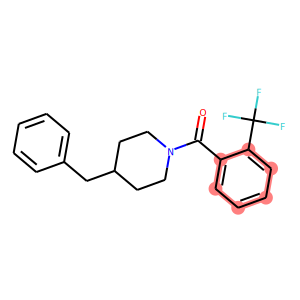

In [27]:
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
d = rdMolDraw2D.MolDraw2DSVG(300,300)
rdMolDraw2D.PrepareAndDrawMolecule(d, cnr1_ligands[300], highlightAtoms=hit_atoms, highlightBonds=hit_bonds)
d.FinishDrawing()
display(SVG(d.GetDrawingText()))

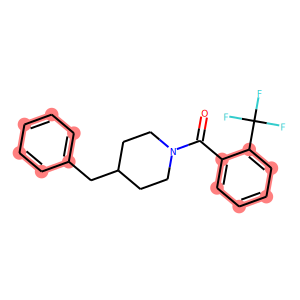

In [28]:
visualize_match(cnr1_ligands[300], benzen_pattern)

In [29]:
benzen_counts_drugbank = [len(m.GetSubstructMatches(benzen_pattern)) for m in drugs]
benzen_counts_drugbank_nonzero = [m for m in benzen_counts_drugbank if m]
len(benzen_counts_drugbank), len(benzen_counts_drugbank_nonzero),\
sum(benzen_counts_drugbank_nonzero)/len(benzen_counts_drugbank_nonzero),\
max(benzen_counts_drugbank_nonzero)

(7113, 4288, 1.572061567164179, 8)

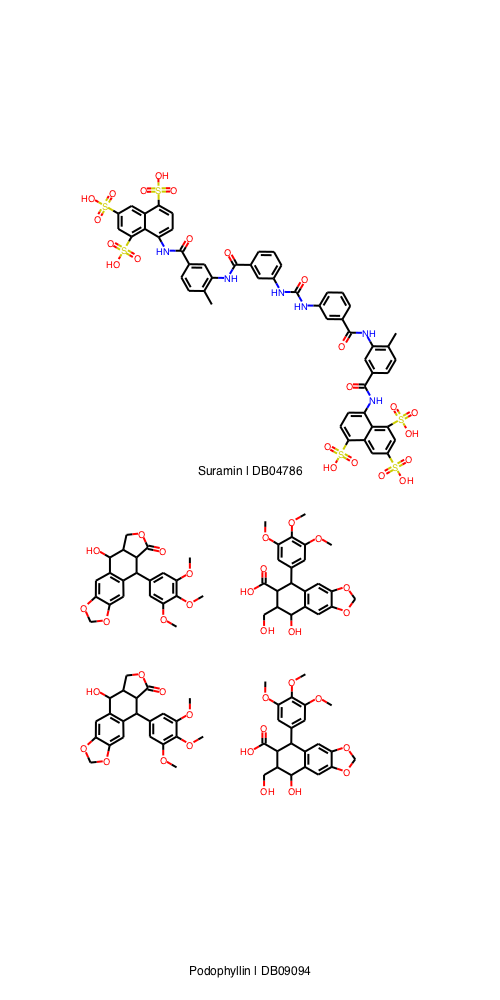

In [30]:
lots_of_benzen = [m for m, i in zip(drugs, benzen_counts_drugbank) if i == 8]
Draw.MolsToGridImage(lots_of_benzen, molsPerRow=1, subImgSize=(500,500),
                     legends=["{} | {}".format(m.GetProp('GENERIC_NAME'), m.GetProp('DRUGBANK_ID'))
                              for m in lots_of_benzen])

Not so precise. So, basic search also tagged as molecule with 8 cycles isomeres of podophyllin, that uses as a medication to treat genital warts and plantar warts, including in people with HIV/AIDS. Suramin, our only right hit s a medication used to treat African sleeping sickness and river blindness.

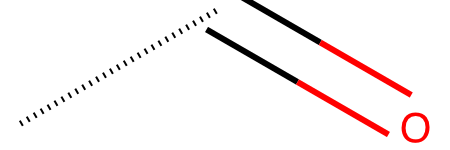

In [31]:
acetaldehyde_pattern = Chem.MolFromSmarts('CC=O')
acetaldehyde_pattern

In [32]:
acetaldehyde_counts_cnr1 = [len(m.GetSubstructMatches(acetaldehyde_pattern)) for m in cnr1_ligands]
acetaldehyde_counts_cnr1_nonzero = [m for m in acetaldehyde_counts_cnr1 if m]
len(acetaldehyde_counts_cnr1), len(acetaldehyde_counts_cnr1_nonzero), sum(acetaldehyde_counts_cnr1_nonzero)/len(acetaldehyde_counts_cnr1_nonzero),\
max(acetaldehyde_counts_cnr1_nonzero)

(2698, 984, 1.5670731707317074, 20)

In [35]:
acetaldehyde_counts_drugbank = [len(m.GetSubstructMatches(acetaldehyde_pattern)) for m in drugs]
acetaldehyde_counts_drugbank_nonzero = [m for m in acetaldehyde_counts_drugbank if m]
len(acetaldehyde_counts_drugbank), len(acetaldehyde_counts_drugbank_nonzero),\
sum(acetaldehyde_counts_drugbank_nonzero)/len(acetaldehyde_counts_drugbank_nonzero),\
max(acetaldehyde_counts_drugbank_nonzero)

(7113, 3342, 2.0960502692998206, 56)

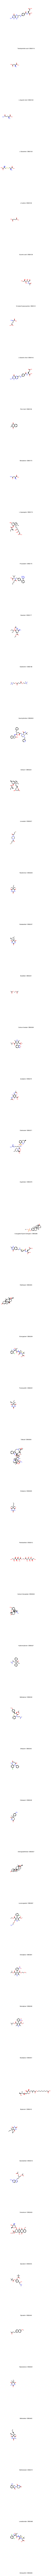

In [36]:
lots_of_acetaldehyde = [m for m, i in zip(drugs, acetaldehyde_counts_drugbank) if i == 2]
Draw.MolsToGridImage(lots_of_acetaldehyde, molsPerRow=1, subImgSize=(500,500),
                     legends=["{} | {}".format(m.GetProp('GENERIC_NAME'), m.GetProp('DRUGBANK_ID'))
                              for m in lots_of_acetaldehyde])

In [37]:
from itertools import chain
# load PAINS structures in SMARTS format from two files in data
pains = []
with open('../data/pains/p_l15.txt', 'r') as f, open('../data/pains/p_m150.txt', 'r') as p:
    for line in chain(f, p):
        pattern, text = line.strip().split('\t') # split by tab
        pains.append([Chem.MolFromSmarts(pattern),
                      text.lstrip("<regId=\"").rstrip("\">")]) # remove the xml tags
pains, len(pains)

([[<rdkit.Chem.rdchem.Mol at 0x11c5b1b70>, 'anil_di_alk_F(14)'],
  [<rdkit.Chem.rdchem.Mol at 0x11c5b14e0>, 'hzone_anil(14)'],
  [<rdkit.Chem.rdchem.Mol at 0x11c5b12b0>, 'het_5_pyrazole_OH(14)'],
  [<rdkit.Chem.rdchem.Mol at 0x11c5b1530>, 'het_thio_666_A(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x11c5ae3a0>, 'styrene_A(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x11c5ae2b0>, 'ne_rhod_C(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x11c5ae1c0>, 'hp_amino_CN_A(13)'],
  [<rdkit.Chem.rdchem.Mol at 0x11c5ae210>, 'cyano_imine_C(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x11c5ae030>, 'thio_urea_A(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x11cb52990>, 'thiophene_amino_B(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x11cb52c60>, 'keto_keto_beta_B(12)'],
  [<rdkit.Chem.rdchem.Mol at 0x11cb529e0>, 'keto_phenone_A(11)'],
  [<rdkit.Chem.rdchem.Mol at 0x11cb52b70>, 'cyano_pyridone_C(11)'],
  [<rdkit.Chem.rdchem.Mol at 0x11cb52a30>, 'thiaz_ene_C(11)'],
  [<rdkit.Chem.rdchem.Mol at 0x11cb52940>, 'hzone_thiophene_A(11)'],
  [<rdkit.Chem.rdche

In [38]:
for m in cnr1_ligands: 
    m.pain_hits = [i for i, pain in enumerate(pains) if m.HasSubstructMatch(pain[0])]

cnr1_with_pains = [m for m in cnr1_ligands if m.pain_hits]
cnr1_with_pains

In [39]:
len(cnr1_with_pains)

27

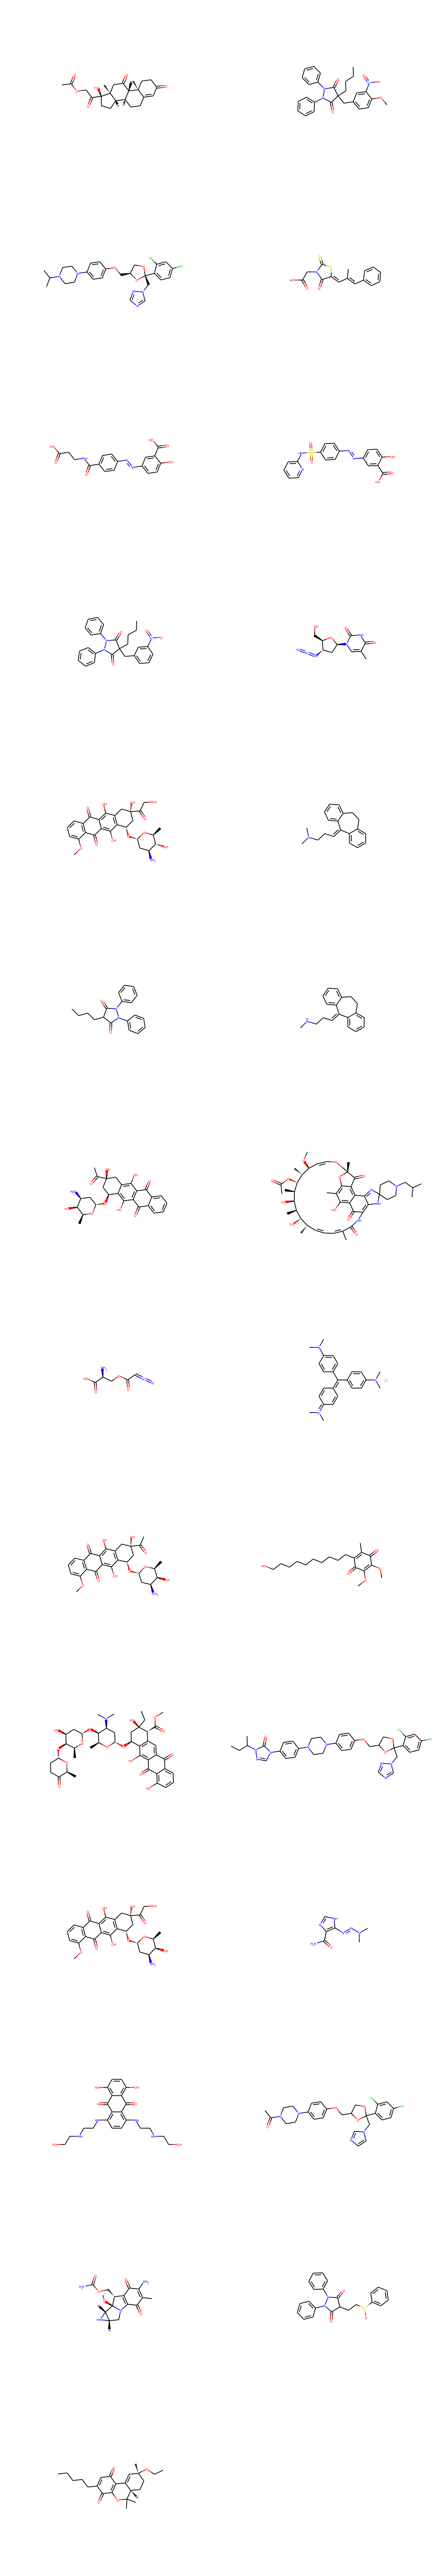

In [40]:
Draw.MolsToGridImage(cnr1_with_pains, molsPerRow=2, subImgSize=(600, 500))

In [41]:
cnr1_with_pains[26].pain_hits, pains[cnr1_with_pains[26].pain_hits[0]]

([413], [<rdkit.Chem.rdchem.Mol at 0x11c930e90>, 'quinone_A(370)'])

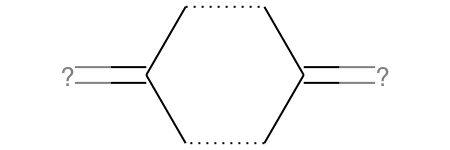

In [42]:
pains[cnr1_with_pains[26].pain_hits[0]][0]

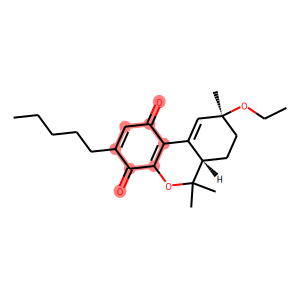

In [43]:
visualize_match(cnr1_with_pains[26], pains[cnr1_with_pains[26].pain_hits[0]][0])